### Import libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
train = pd.read_csv('data/train_v9rqX0R.csv')
test = pd.read_csv('data/test_AbJTz2l.csv')

### EDA

In [3]:
# Basic Data Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Missing Value Check
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Observation

1) Data quality issue - Item_Weight, Outlet_Size data is missing
2) Item_Weight (1463) and Outlet_Size (2410) data points missing

In [5]:
# Duplicate value check
train.duplicated().sum()

0

Text(0.5, 1.0, 'Missing Values Heatmap')

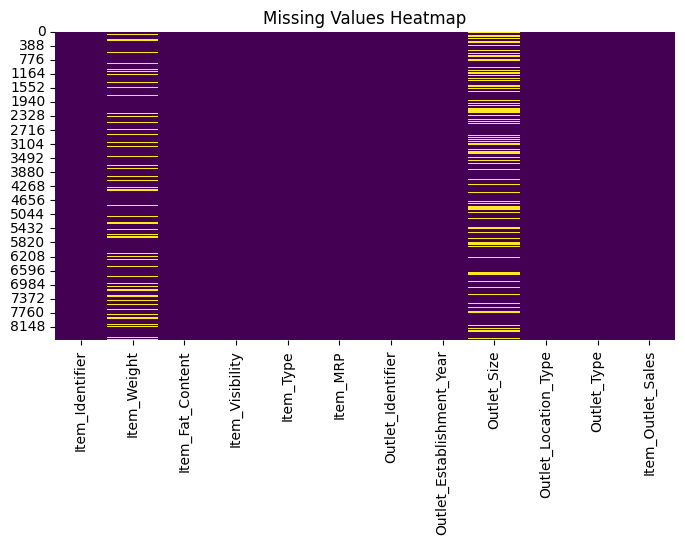

In [6]:
# Missing Values Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')


In [7]:
# Basic description
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#Categorical value check
for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    print(f'\n{col} value counts:')
    print(train[col].value_counts())


Item_Fat_Content value counts:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type value counts:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size value counts:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type value counts:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type value counts:
Outlet_Type
Supermarket Type1    5577
G

### Observation 

1) Inconsistancy in labelling for Item_Fat_Content where Low_Fat(5089),Regular(2889),(LF,316),reg(117),low_fat(112) we can make 2 category out of it.
2) Item_type is 16 category we need to come with a plan to reduce it to sub category.
3) Outlet_Location_Type have an great balance of data in all the ties location type.
4) Outlet_Type also have good distribution across the market type.

Text(0.5, 1.0, 'Distribution of Item Outlet Sales')

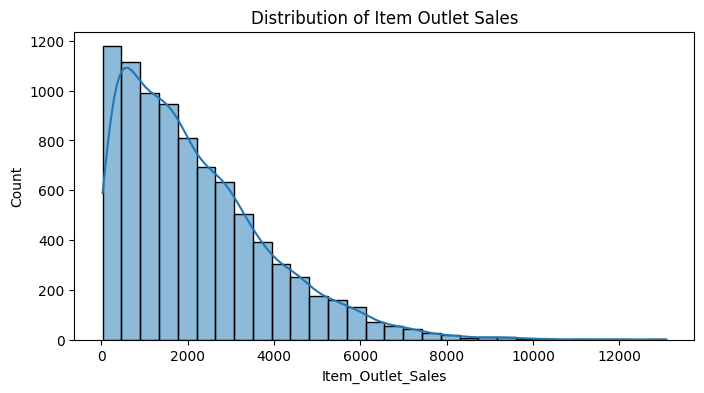

In [9]:
# Distribution of Target Variable - Item Outlet Sales
plt.figure(figsize=(8,4))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')

### Observation

1) Highly right skewed distribution shows sales mostly concentrated in lower range
2) 

Text(0.5, 1.0, 'Distribution of Item_Weight')

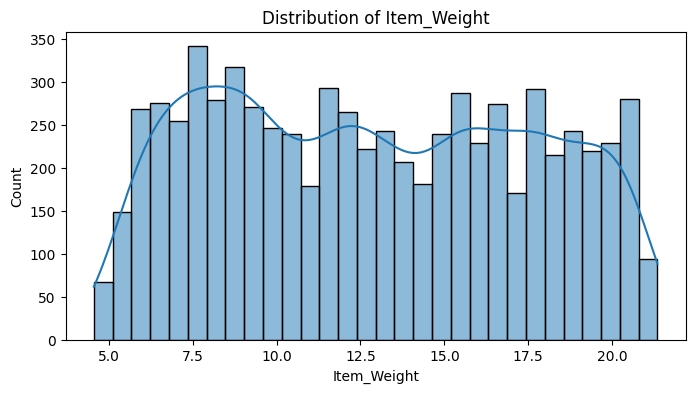

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(train["Item_Weight"], bins=30, kde=True)
plt.title(f'Distribution of Item_Weight')

### Observation:

1) Normal Distribution with many local maxima

Text(0.5, 1.0, 'Distribution of Item_Visibility')

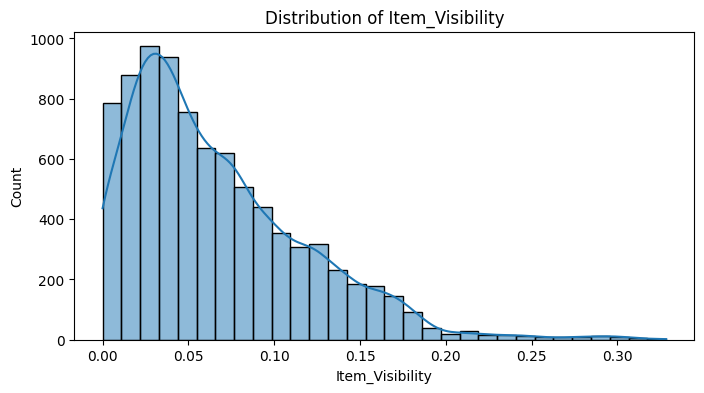

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(train["Item_Visibility"], bins=30, kde=True)
plt.title(f'Distribution of Item_Visibility')

# Observation

1) Many items visibility is 0 to 0.05 only few items visibility is >0.15
2) Low visibility suggest very poor performance

Text(0.5, 1.0, 'Distribution of Item_MRP')

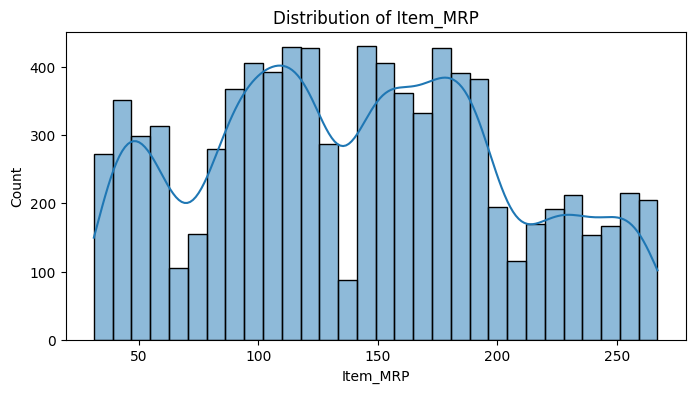

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(train["Item_MRP"], bins=30, kde=True)
plt.title(f'Distribution of Item_MRP')

### Observation

1) Normal distribution with several local maxima good distribution of pricing 50, 100, 150, 200 shows product is categorised for targeted customers

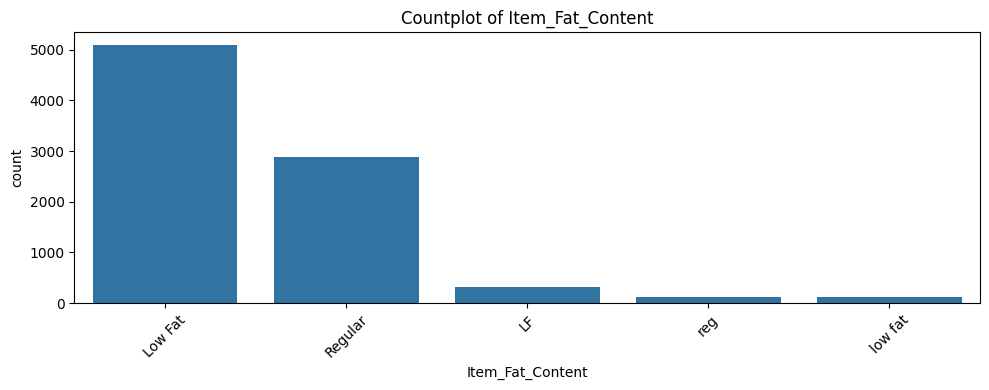

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x="Item_Fat_Content", order=train["Item_Fat_Content"].value_counts().index)
plt.title(f'Countplot of Item_Fat_Content')
plt.xticks(rotation=45)
plt.tight_layout()

### Observations

1) we gonna merge Low fat + LF + low fat
2) Regular + reg
3) Distribution of balanced data set is pretty much ok

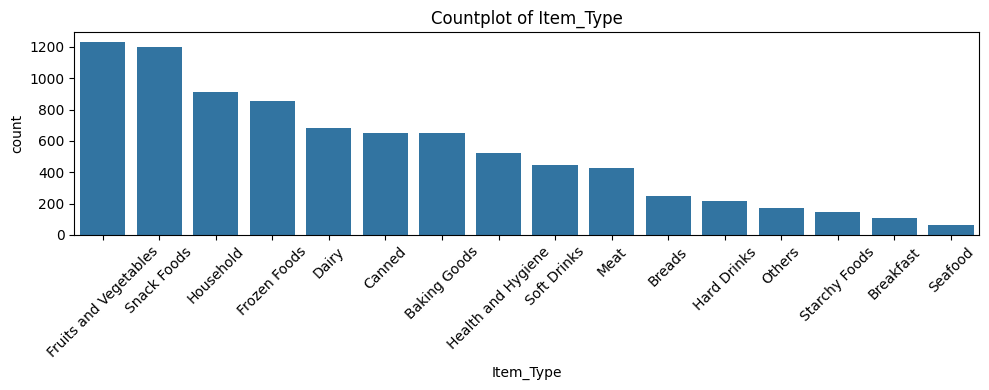

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x="Item_Type", order=train["Item_Type"].value_counts().index)
plt.title(f'Countplot of Item_Type')
plt.xticks(rotation=45)
plt.tight_layout()

### Observation

1) well balanced category

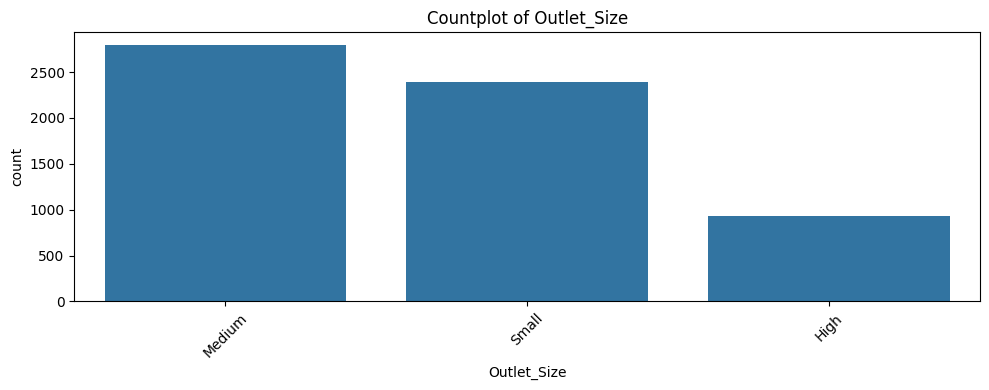

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x="Outlet_Size", order=train["Outlet_Size"].value_counts().index)
plt.title(f'Countplot of Outlet_Size')
plt.xticks(rotation=45)
plt.tight_layout()

### Observation

1) well balanced category 

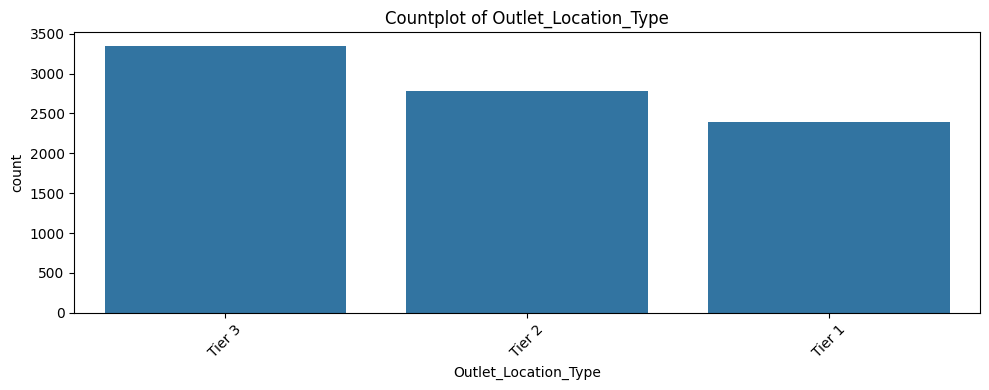

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x="Outlet_Location_Type", order=train["Outlet_Location_Type"].value_counts().index)
plt.title(f'Countplot of Outlet_Location_Type')
plt.xticks(rotation=45)
plt.tight_layout()

### Observation

1) well balanced category 

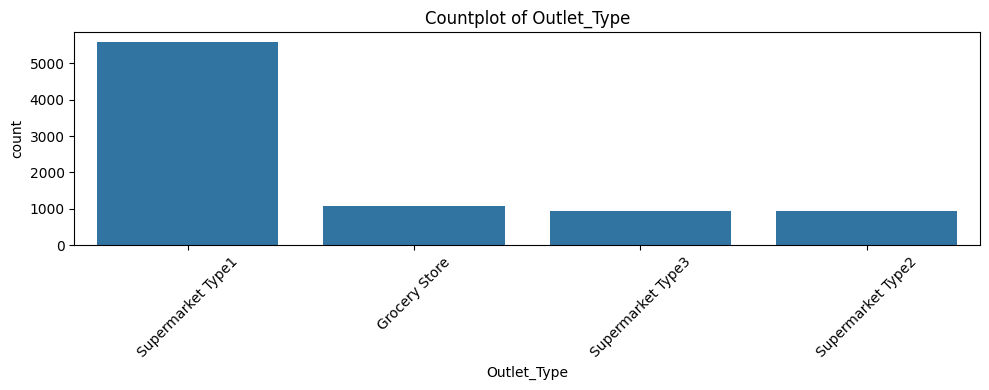

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x="Outlet_Type", order=train["Outlet_Type"].value_counts().index)
plt.title(f'Countplot of Outlet_Type')
plt.xticks(rotation=45)
plt.tight_layout()

### Observation

1) Supermarket Type 1 seems have more sales than others so we can utilise the feature here

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix')

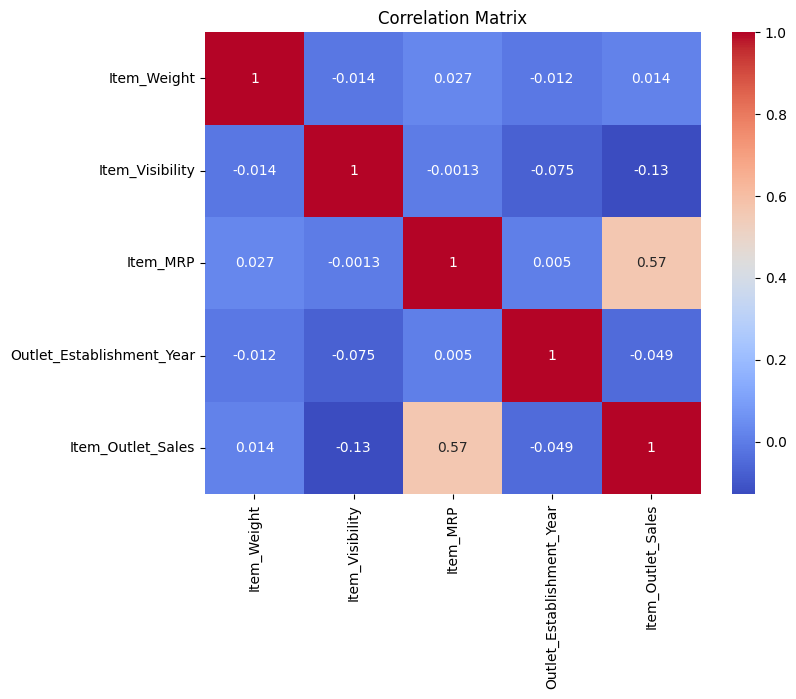

In [18]:
import numpy as np
numeric_cols = train.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Observation

1) Item_MRP and Item_Outlet_Sales have strogest corelation which is 0.57.
2) Item_Visibilityand Item_Outlet_Sales have weakest corelation which is -0.13.
3) Item_Weight and Outlet_Establishment_Year have nearly zero impact on target variable Item_Outlet_Sales